In [250]:
import experiment
import models

from experiment import *

In [251]:
sim = Exp()

concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-9 for c in concs]

start = 0
stop = 100000000
num = 10000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,num), np.linspace(start,stop*2,num))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [252]:
sim.model = models.Heterogeneous_ligand()
try:
    sim.model.params_definitions['ymax1'].user_data['type']='global'
    sim.model.params_definitions['ymax2'].user_data['type']='global'
except:
    sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [253]:
ys = []
s='''
ymax2_ds0	1.07440289	0.00555513	(0.52%)	1	1.0000e-12	10.0000000	True
ymax2_ds2	0.74137523	0.00303703	(0.41%)	1	1.0000e-12	10.0000000	True
ymax2_ds4	0.63299230	0.00165785	(0.26%)	1	1.0000e-12	10.0000000	True
ymax2_ds5	2.09278948	0.01549166	(0.74%)	1	1.0000e-12	10.0000000	True
ymax2_ds6	1.35162578	0.00874111	(0.65%)	1	1.0000e-12	10.0000000	True
ymax2_ds7	1.39197308	0.01299785	(0.93%)	1	1.0000e-12	10.0000000	True
ymax2_ds8	1.45662398	0.00917051	(0.63%)	1	1.0000e-12	10.0000000	True
ymax2_ds9	0.83880528	0.00470585	(0.56%)	1	1.0000e-12	10.0000000	True
ymax2_ds10	0.68939241	0.00288932	(0.42%)	1	1.0000e-12	10.0000000	True
ymax2_ds11	0.53933880	0.00162342	(0.30%)	1	1.0000e-12	10.0000000	True
ymax2_ds12	1.37955903	0.00885561	(0.64%)	1	1.0000e-12	10.0000000	True
ymax2_ds13
'''

for line in s.split('\n'):
    try:
        ys.append(float(line.split()[1]))
    except: 
        pass

sum(ys)/len(ys)


1.1080798418181816

In [254]:
sim.params['ka1'].value =  3510.81953
sim.params['kd1'].value =  0.02087666
sim.params['ka2'].value =		686.383287	
sim.params['kd2'].value =	1.0000e-06	
sim.params['ymax1'].value = 0.6999083466666668
sim.params['ymax2'].value = 1.1080798418181816

    # sim.params['ymax1'].value = 1
    # sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [255]:
sim.params

name,value,initial value,min,max,vary
ka1,3510.81953,10000.0,10.0000000,10000000.0,True
kd1,0.02087666,0.01,1.0000e-06,0.10000000,True
ka2,686.383287,10000.0,10.0000000,10000000.0,True
kd2,1.0000e-06,0.01,1.0000e-06,0.10000000,True
ymax1,0.69990835,1,1.0000e-12,10.0000000,True
ymax2,1.10807984,1,1.0000e-12,10.0000000,True


In [256]:
sim.simulate_response(None, 0, 0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

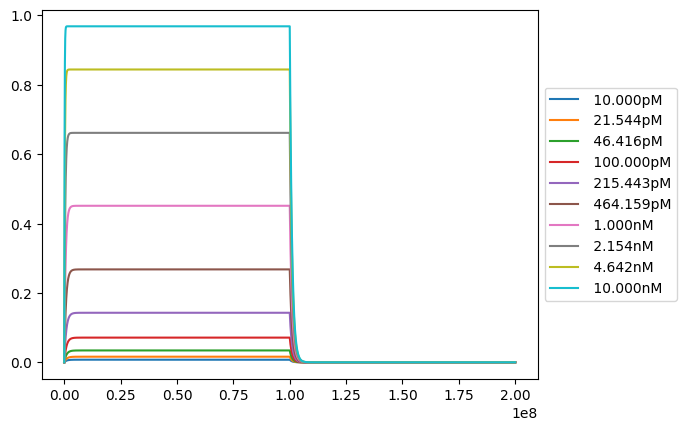

In [257]:
sim.plot()

In [258]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


In [259]:
# import numpy as np
# import scipy.optimize
# import matplotlib.pyplot as plt

# xs = np.array(xs)
# ys = np.array(ys)

# xs_fitted = np.linspace(0, xs[-1], num=100)

# def func(x, Kd):
#     return ymax*x/(Kd+x)

# p0 = (1e-6)

# params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
# print(params)
# # perform the fit
# Kd = params[0]


# # determine quality of the fit
# squaredDiffs = np.square(ys - func(xs, Kd))
# squaredDiffsFromMean = np.square(ys - np.mean(ys))
# rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(f"R² = {rSquared}")

# # plot the results
# plt.plot(xs, ys, '.', label="data")
# plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# # plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# # inspect the parameters


# plt.show()


False 1e-08 0.9683465325813226 5e-09
True 5e-09 0.858645134900259 4.500000000000001e-09
False 9.5e-09 0.9618577603328269 4.500000000000001e-09
True 5e-09 0.858645134900259 4.050000000000001e-09
False 9.050000000000002e-09 0.9554946064075208 4.050000000000001e-09
True 5.000000000000001e-09 0.858645134900259 3.6450000000000005e-09
False 8.645000000000002e-09 0.9492870781755945 3.6450000000000005e-09
True 5.000000000000002e-09 0.8586451349002591 3.2805000000000004e-09
False 8.280500000000003e-09 0.9432621820620618 3.2805000000000004e-09
True 5.000000000000002e-09 0.8586451349002591 2.9524500000000005e-09
False 7.952450000000002e-09 0.937443503782278 2.9524500000000005e-09
True 5.000000000000002e-09 0.8586451349002591 2.6572050000000006e-09
False 7.657205000000003e-09 0.9318509255088223 2.6572050000000006e-09
True 5.000000000000002e-09 0.8586451349002591 2.3914845000000007e-09
False 7.391484500000002e-09 0.9265004802303765 2.3914845000000007e-09
True 5.000000000000002e-09 0.858645134900259

(<Figure size 640x480 with 1 Axes>, <Axes: >)

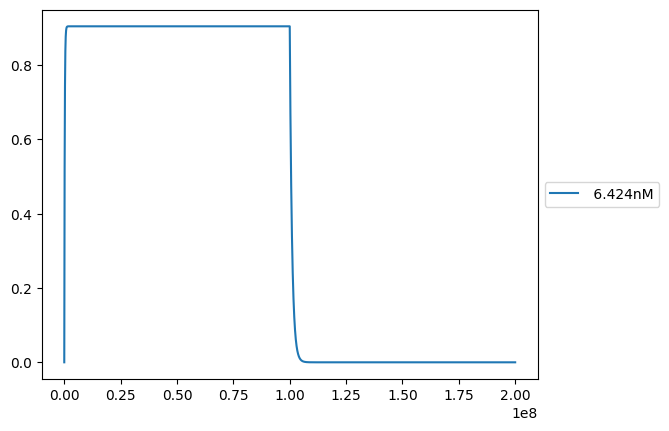

In [260]:
c=concs[-1]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
ymax = sim.params['ymax1'].value+sim.params['ymax2'].value

for i in range(1000):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,num), np.linspace(start,stop*2,num))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(y<ymax/2, c, y, diff)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff
        diff = diff*0.9

temp.plot()

In [69]:
ymax

1.1330437545454546

In [226]:
K1 = 0.01456596		/	418093.700	
K1

3.483898465822374e-08

In [228]:
K2 = 1.0000e-06	/ 57537.4536
K2

1.7379983600803634e-11

In [108]:
KD = K1*K2
KD

1.952094248694202e-17

In [81]:
t = temp.datasets[0].steps[0].stop
mask = temp.datasets[0].t >= t
temp.datasets[0].response[mask][0]

0.8832555385621814

In [188]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)